<a href="https://colab.research.google.com/github/rimchristian/CreditCard/blob/main/creditcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

# Models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

# Classification Metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, \
RocCurveDisplay

from sklearn.model_selection import GridSearchCV

# Import SMOTE
from imblearn.over_sampling import SMOTE
# Import special pipeline for smote
from imblearn.pipeline import make_pipeline as smote_pipe

from sklearn import metrics

# Set global scikit-learn configuration 
from sklearn import set_config
# Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

In [ ]:
filename = '/content/creditcard.csv'
df = pd.read_csv(filename)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Define a function that takes in arguments and prints out a classification report and confusion matrix
def evaluate_classification(model, X_test, y_test, cmap='Greens',
                            normalize=None, classes=None, figsize=(20,5)):
  """Takes as arguments: a model, features, and labels
  Prints a classification report, confusion matrix
  Optional arguments: 
    cmap: colormap 
    normalize: confusion matrix normalization ['true', 'pred', 'all' or None]
    classes: ordered list of class labels
    figsize: size of figure"""
  test_preds = model.predict(X_test)
  print(metrics.classification_report(y_test, test_preds, 
                                      zero_division=0,
                                      target_names=classes))
  
  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=cmap, 
                                display_labels=classes,
                                normalize=normalize)
  plt.show()

**Data Exploration**

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 284807 rows, and 31 columns.
The rows represent 284807 observations, and the columns represent 30 features and 1 target variable.


In [ ]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No missing data

In [ ]:
df.duplicated().sum()
print(f'There are {df.duplicated().sum()} duplicate rows.')


There are 1081 duplicate rows.


In [ ]:
df.nunique()

Time      124527
V1        274887
V2        274889
V3        274891
V4        274888
V5        274891
V6        274886
V7        274885
V8        274877
V9        274890
V10       274881
V11       274882
V12       274888
V13       274891
V14       274888
V15       274887
V16       274879
V17       274880
V18       274889
V19       274880
V20       274866
V21       274851
V22       274878
V23       274845
V24       274879
V25       274874
V26       274881
V27       274831
V28       274793
Amount     32737
Class          2
dtype: int64

In [ ]:
# dropping duplicate values
df.drop_duplicates(keep=False, inplace=True)
print(f'There are {df.duplicated().sum()} duplicate rows.')


There are 0 duplicate rows.


In [ ]:
df['Class'].value_counts()

0    282493
1       460
Name: Class, dtype: int64

There are 460 transactions which were fraudulent and 282,493 good transactions 

In [ ]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94840.240208,0.017304,-0.012241,0.013551,-0.011850,0.007926,0.000553,0.011110,-0.00363,0.001367,...,-0.000208,-0.000959,0.000020,0.000503,0.000554,-0.000410,0.000247,0.002449,0.000607,88.476932
1,80087.628261,-4.376653,3.311484,-6.534364,4.407571,-2.830642,-1.406285,-4.986946,0.97551,-2.470670,...,0.416612,0.394720,0.100917,-0.105252,-0.111322,0.038273,0.043374,0.236649,0.082442,124.045239


Observations:

 Average sum of transactions which were fraudulent is better than that of the ones thats clear. All of the "V1,V2,V3...." columns for Class 1 were consistently greater


In [ ]:
# detecting any outliers
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,...,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000,282953.000000
mean,94816.256714,0.010161,-0.006837,0.002906,-0.004665,0.003311,-0.001734,0.002985,-0.002038,-0.002651,...,-0.000316,0.000184,0.000332,0.000372,-0.000347,0.000317,0.002830,0.000740,88.534756,0.001626
std,47479.631543,1.940990,1.643708,1.504189,1.413356,1.374938,1.331984,1.223249,1.173378,1.094047,...,0.721104,0.724223,0.623093,0.605599,0.521199,0.481876,0.391139,0.327223,250.567570,0.040287
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54213.000000,-0.912989,-0.601721,-0.888987,-0.851101,-0.688407,-0.769506,-0.551470,-0.209036,-0.645213,...,-0.228236,-0.542743,-0.161658,-0.354423,-0.317659,-0.326567,-0.070453,-0.052736,5.590000,0.000000
50%,84704.000000,0.022459,0.062929,0.180273,-0.023625,-0.052817,-0.275914,0.041333,0.021522,-0.052847,...,-0.029370,0.007041,-0.011184,0.041074,0.016162,-0.052152,0.001564,0.011312,22.000000,0.000000
75%,139294.000000,1.316582,0.797751,1.027190,0.737319,0.612704,0.395220,0.570666,0.324281,0.594912,...,0.186184,0.528316,0.147729,0.439880,0.350621,0.239885,0.091310,0.078270,77.710000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


There are outliers in the data. Looking at the 'Amount' column, the max max value is 12,910, and the mean is 259.36.  There is a huge gap in between the numbers. Also the standard deviation is 95. 

In [ ]:
missing = df.isna().sum()
print('There are 0 missing values')

There are 0 missing values


In [ ]:
import plotly.express as px

fig = px.histogram(df, x="Amount")
fig.show()

From this visual,  the data doesn't show a clear normal distribution. Since the data is skewed, instead of z-score, the IQR to determine the outliers.

In [ ]:
#create a box plot

fig = px.box(df, y='Amount')

fig.show()

I used the boxplot to take a deeper look into the outliers.  There are quite a few outliers above the long line at the bottom, which is the box. 

In [ ]:
#create a function to find outliers using IQR

def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [ ]:
outliers = find_outliers_IQR(df['Amount'])

print('number of outliers: '+ str(len(outliers)))

print('max outlier value: '+ str(outliers.max()))

print('min outlier value: '+ str(outliers.min()))

number of outliers: 31585
max outlier value: 25691.16
min outlier value: 185.9


Using the IQR method, there is 31,585 outliers in the data.  I printed the min/max value to match the values in the describe function I did. 

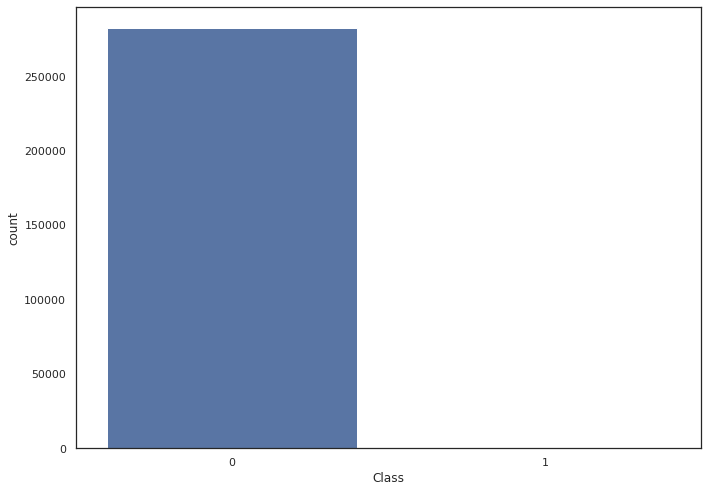

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 7.0)
sns.set(style="white")
sns.countplot(x='Class', data=df)
plt.tight_layout()
plt.show()

Histograms are helpful tools to use for numeric variables during the exploratory phrase. 
The scale for this data is too large so thats why we can't see the Class 1 values. 

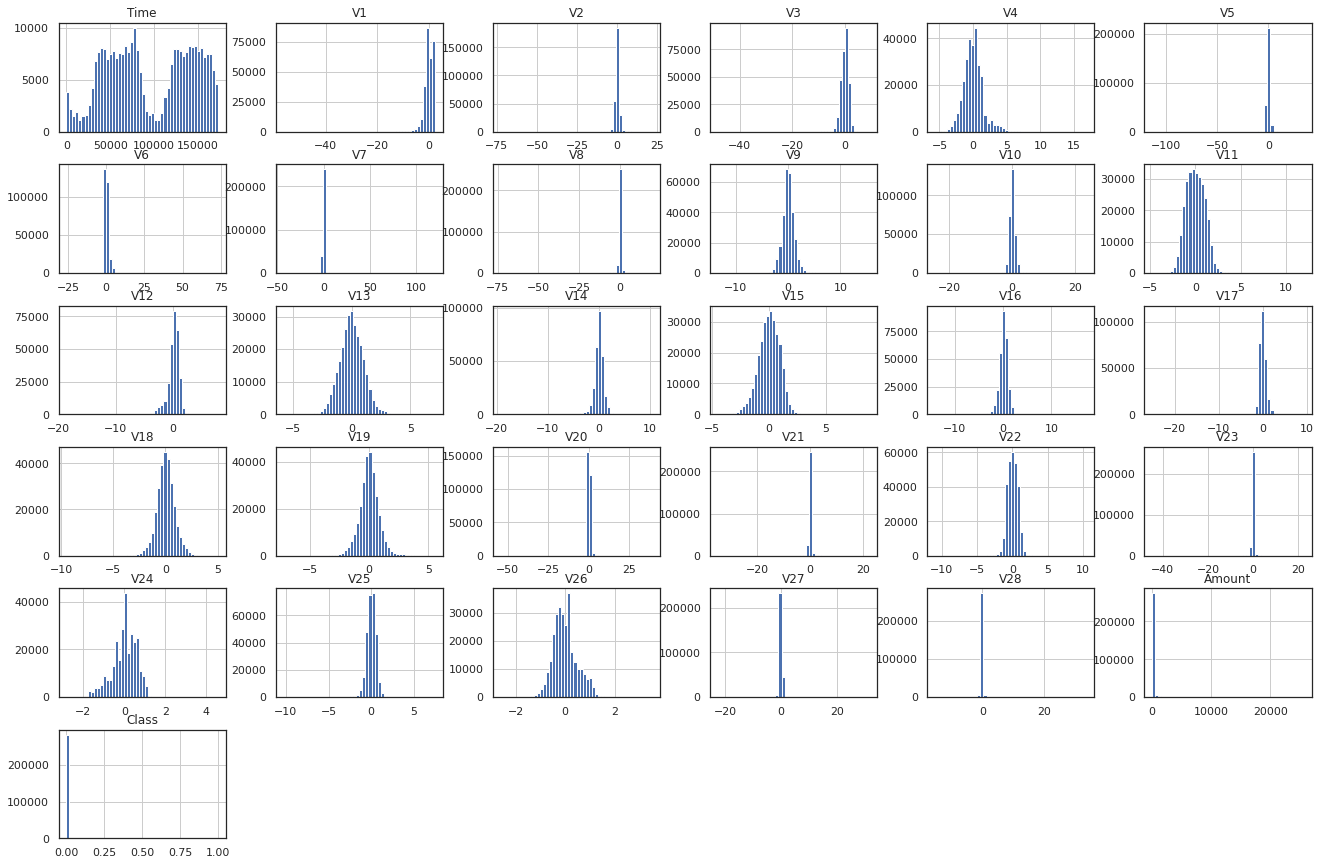

In [ ]:
# shows the histograms for each column
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

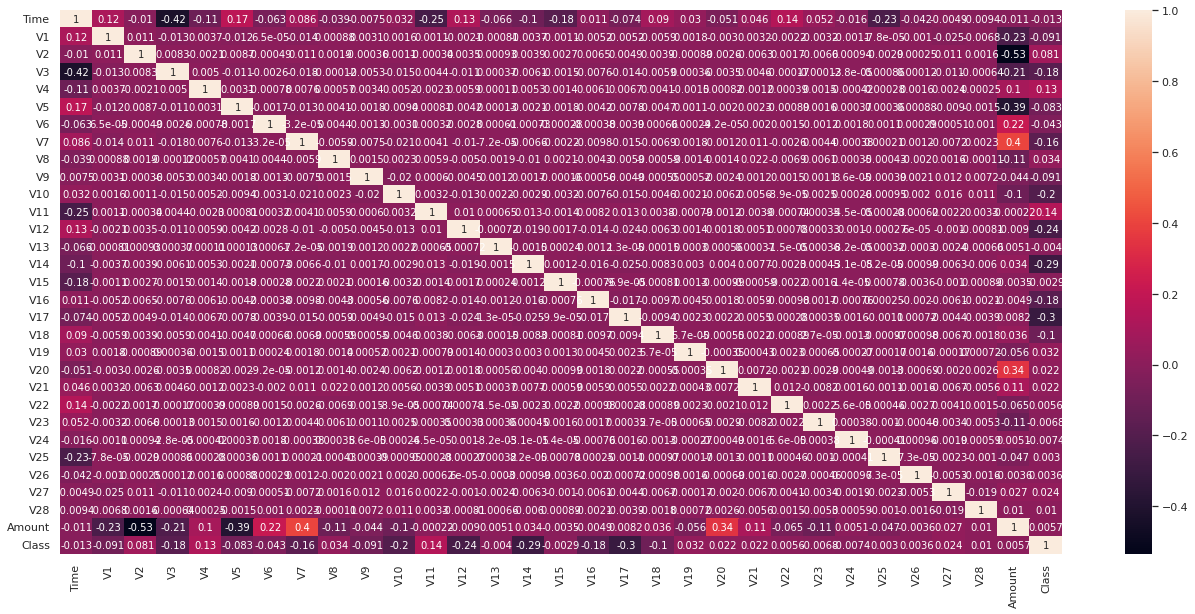

In [ ]:
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
sns.heatmap(df.corr(), annot=True)

In [ ]:
corr_matrix = df.corr()
corr_matrix['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.144192
V4        0.125975
V2        0.081465
V8        0.033618
V19       0.032107
V27       0.024123
V21       0.022106
V20       0.021827
V28       0.010075
Amount    0.005719
V22       0.005613
V26       0.003606
V25       0.002990
V15      -0.002861
V13      -0.003959
V23      -0.006838
V24      -0.007443
Time     -0.012518
V6       -0.042551
V5       -0.083174
V9       -0.091031
V1       -0.091201
V18      -0.100683
V7       -0.164610
V3       -0.175376
V16      -0.179892
V10      -0.199209
V12      -0.242007
V14      -0.285177
V17      -0.302410
Name: Class, dtype: float64

The feature 'class' tends to increase when the features 'V11','V4','V2' go up. It tends to decrease when the 'V17','V14','V12' go down. You can see small positive coorelations between the middle columns. Finally, coefficients close to zero indicuate that there is no linear correlation.

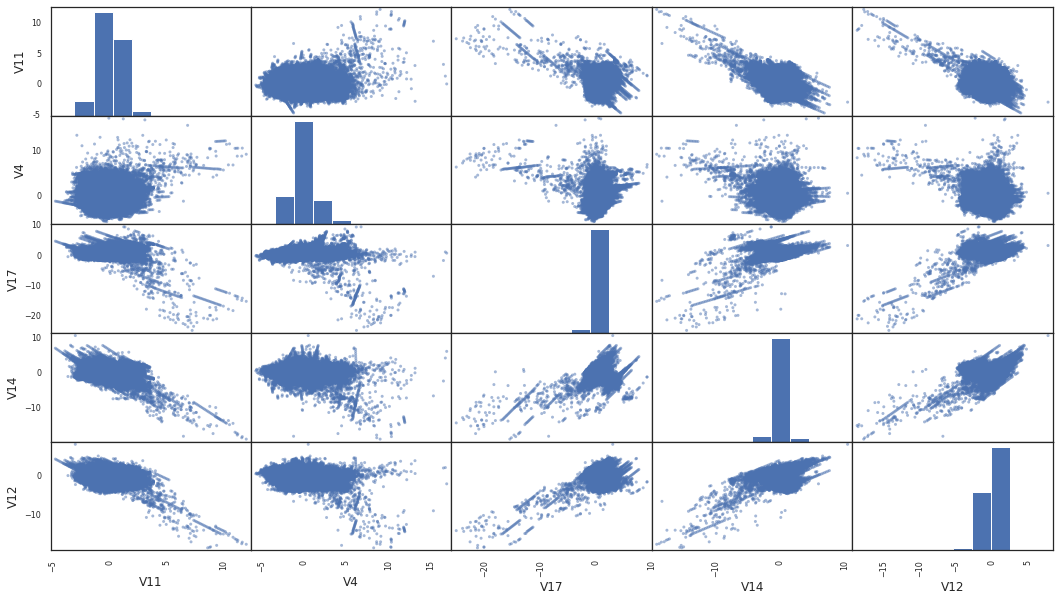

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["V11", "V4", "V17", "V14", "V12"]
scatter_matrix(df[attributes], figsize=(16, 10))
plt.savefig('matrix.png')

The most promosing variable for predicting the feature 'class' is the feature 'V12'. 

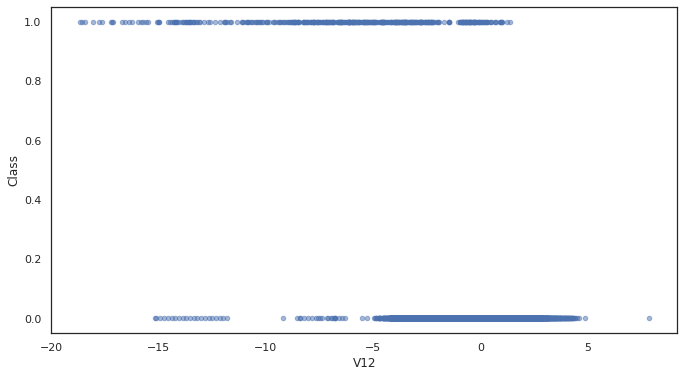

In [35]:
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
df.plot(kind="scatter", x="V12", y="Class", alpha=0.5)
plt.savefig('scatter.png')

The coorelation is in fact very strong. Can clearly see that the points are not too dispersed.